## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import get_cmap
import seaborn as sns

import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, pointbiserialr
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss, average_precision_score, precision_recall_curve, roc_curve, auc
from seaborn.matrix import heatmap
from seaborn.distributions import kdeplot

import pickle
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)

## LOAD DATASET

In [2]:
df = pd.read_csv('Telcom_Customer_Churn.csv')
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.828,-118.999,2,9,NaN,Yes,42.390,No,Yes,Cable,16.000,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.600,593.300,0.000,0,381.510,974.810,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.163,-118.204,0,9,NaN,Yes,10.690,Yes,Yes,Cable,10.000,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.000,542.400,38.330,10,96.210,610.280,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.646,-117.923,0,4,Offer E,Yes,33.650,No,Yes,Fiber Optic,30.000,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.900,280.850,0.000,0,134.600,415.450,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014,-122.115,1,13,Offer D,Yes,27.820,No,Yes,Fiber Optic,4.000,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.000,1237.850,0.000,0,361.660,1599.510,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.228,-119.080,3,3,NaN,Yes,7.380,No,Yes,Fiber Optic,11.000,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.900,267.400,0.000,0,22.140,289.540,Churned,Dissatisfaction,Network reliability


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

## DATA PRE-PROCESSING 1

In [4]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [5]:
df.duplicated().sum()

0

### HANDLING MISSING VALUES

In [6]:
df[df['Offer'].isnull()]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.828,-118.999,2,9,NaN,Yes,42.390,No,Yes,Cable,16.000,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.600,593.300,0.000,0,381.510,974.810,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.163,-118.204,0,9,NaN,Yes,10.690,Yes,Yes,Cable,10.000,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.000,542.400,38.330,10,96.210,610.280,Stayed,NaN,NaN
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.228,-119.080,3,3,NaN,Yes,7.380,No,Yes,Fiber Optic,11.000,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.900,267.400,0.000,0,22.140,289.540,Churned,Dissatisfaction,Network reliability
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.985,-121.345,3,65,NaN,Yes,28.460,Yes,Yes,Cable,14.000,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,90.450,5957.900,0.000,0,1849.900,7807.800,Stayed,NaN,NaN
10,0017-DINOC,Male,47,No,0,Rancho Santa Fe,92091,32.994,-117.207,0,54,NaN,No,NaN,NaN,Yes,Cable,10.000,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,45.200,2460.550,0.000,0,0.000,2460.550,Stayed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,9972-VAFJJ,Female,77,Yes,0,San Diego,92116,32.765,-117.123,1,53,NaN,Yes,47.640,No,Yes,Fiber Optic,25.000,No,Yes,Yes,Yes,Yes,No,No,Yes,One Year,Yes,Bank Withdrawal,94.000,4871.450,0.000,0,2524.920,7396.370,Stayed,NaN,NaN
7032,9975-GPKZU,Male,62,Yes,3,Alameda,94501,37.775,-122.274,0,46,NaN,Yes,7.670,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Credit Card,19.750,856.500,0.000,0,352.820,1209.320,Stayed,NaN,NaN
7034,9978-HYCIN,Male,72,Yes,1,Bakersfield,93301,35.384,-119.020,1,47,NaN,Yes,42.290,No,Yes,Fiber Optic,22.000,No,Yes,No,No,Yes,No,No,No,One Year,Yes,Bank Withdrawal,84.950,4018.050,0.000,80,1987.630,6085.680,Stayed,NaN,NaN
7037,9986-BONCE,Female,36,No,0,Fallbrook,92028,33.363,-117.300,0,4,NaN,Yes,2.010,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Bank Withdrawal,20.950,85.500,0.000,0,8.040,93.540,Churned,Competitor,Competitor made better offer


In [7]:
df.drop(columns='Offer', inplace=True)

In [8]:
df[(df['Avg Monthly Long Distance Charges'].isnull()) & (df['Multiple Lines'].isnull())]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
10,0017-DINOC,Male,47,No,0,Rancho Santa Fe,92091,32.994,-117.207,0,54,No,NaN,NaN,Yes,Cable,10.000,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,45.200,2460.550,0.000,0,0.000,2460.550,Stayed,NaN,NaN
14,0019-GFNTW,Female,39,No,0,Los Olivos,93441,34.704,-120.026,0,56,No,NaN,NaN,Yes,DSL,19.000,Yes,Yes,Yes,Yes,No,No,No,Yes,Two Year,No,Bank Withdrawal,45.050,2560.100,0.000,0,0.000,2560.100,Stayed,NaN,NaN
16,0020-JDNXP,Female,52,Yes,1,Point Reyes Station,94956,38.060,-122.831,0,34,No,NaN,NaN,Yes,DSL,20.000,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,No,Credit Card,61.250,1993.200,0.000,0,0.000,1993.200,Stayed,NaN,NaN
19,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.162,-121.649,0,1,No,NaN,NaN,Yes,Cable,9.000,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.100,25.100,0.000,0,0.000,25.100,Churned,Competitor,Competitor made better offer
25,0032-PGELS,Female,37,Yes,1,Palomar Mountain,92060,33.310,-116.823,1,1,No,NaN,NaN,Yes,DSL,19.000,Yes,No,No,No,No,No,No,Yes,Month-to-Month,No,Bank Withdrawal,30.500,30.500,0.000,0,0.000,30.500,Churned,Attitude,Attitude of service provider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,9906-NHHVC,Female,75,No,0,Macdoel,96058,41.770,-121.921,0,65,No,NaN,NaN,Yes,Cable,9.000,No,Yes,Yes,No,Yes,Yes,No,Yes,Two Year,Yes,Bank Withdrawal,53.500,3517.900,0.000,0,0.000,3517.900,Stayed,NaN,NaN
6980,9907-SWKKF,Female,69,No,0,Twain,95984,40.022,-121.062,0,1,No,NaN,NaN,Yes,DSL,21.000,No,No,No,No,No,No,No,Yes,Month-to-Month,No,Credit Card,25.050,25.050,0.000,0,0.000,25.050,Churned,Competitor,Competitor had better devices
6996,9928-BZVLZ,Female,58,No,0,Sunset Beach,90742,33.719,-118.074,0,12,No,NaN,NaN,Yes,DSL,7.000,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,49.850,552.100,0.000,0,0.000,552.100,Stayed,NaN,NaN
7016,9955-QOPOY,Male,23,Yes,0,Sunnyvale,94089,37.422,-122.010,7,69,No,NaN,NaN,Yes,DSL,42.000,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,60.800,4263.400,0.000,0,0.000,4263.400,Stayed,NaN,NaN


In [9]:
df[(df['Internet Type'].isnull()) & 
   (df['Avg Monthly GB Download'].isnull()) & 
   (df['Online Security'].isnull()) & 
   (df['Online Backup'].isnull()) &
   (df['Device Protection Plan'].isnull()) &
   (df['Premium Tech Support'].isnull()) &
   (df['Streaming TV'].isnull()) &
   (df['Streaming Movies'].isnull()) &
   (df['Streaming Music'].isnull()) &
   (df['Unlimited Data'].isnull())]

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
20,0023-UYUPN,Female,79,Yes,0,Ahwahnee,93601,37.376,-119.740,0,50,Yes,31.430,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,No,Bank Withdrawal,25.200,1306.300,0.000,0,1571.500,2877.800,Stayed,NaN,NaN
23,0030-FNXPP,Female,22,No,0,Keeler,93530,36.560,-117.962,0,3,Yes,3.120,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.850,57.200,0.000,0,9.360,66.560,Joined,NaN,NaN
24,0031-PVLZI,Female,34,Yes,0,Korbel,95550,40.767,-123.805,0,4,Yes,12.430,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,20.350,76.350,0.000,0,49.720,126.070,Churned,Price,Long distance charges
27,0040-HALCW,Male,42,Yes,3,Modesto,95358,37.613,-121.109,3,54,Yes,19.700,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Credit Card,20.400,1090.600,0.000,0,1063.800,2154.400,Stayed,NaN,NaN
28,0042-JVWOJ,Male,64,No,0,Glen Ellen,95442,38.369,-122.523,0,26,Yes,37.700,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,Yes,Bank Withdrawal,19.600,471.850,21.250,0,980.200,1430.800,Stayed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,9970-QBCDA,Female,50,No,0,March Air Reserve Base,92518,33.888,-117.278,0,6,Yes,31.020,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,19.700,129.550,0.000,0,186.120,315.670,Stayed,NaN,NaN
7028,9972-EWRJS,Female,56,Yes,1,Meadow Valley,95956,39.937,-121.058,2,67,Yes,48.750,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,Yes,Bank Withdrawal,19.250,1372.900,0.000,0,3266.250,4639.150,Stayed,NaN,NaN
7032,9975-GPKZU,Male,62,Yes,3,Alameda,94501,37.775,-122.274,0,46,Yes,7.670,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Credit Card,19.750,856.500,0.000,0,352.820,1209.320,Stayed,NaN,NaN
7033,9975-SKRNR,Male,24,No,0,Sierraville,96126,39.560,-120.346,0,1,Yes,49.510,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,18.900,18.900,0.000,0,49.510,68.410,Joined,NaN,NaN


In [10]:
check_churn = df[(df['Churn Category'].isnull()) | (df['Churn Reason'].isnull())]
check_churn['Customer Status'].unique()

array(['Stayed', 'Joined'], dtype=object)

In [11]:
df['Churn Category'].fillna('Not Churned', inplace=True)
df['Churn Reason'].fillna('Not Churned', inplace=True)

In [12]:
df.dropna(inplace=True)

### CHANGING DATA TYPE

In [13]:
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4835 entries, 0 to 7041
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        4835 non-null   object 
 1   Gender                             4835 non-null   object 
 2   Age                                4835 non-null   int64  
 3   Married                            4835 non-null   object 
 4   Number of Dependents               4835 non-null   int64  
 5   City                               4835 non-null   object 
 6   Zip Code                           4835 non-null   int64  
 7   Latitude                           4835 non-null   float64
 8   Longitude                          4835 non-null   float64
 9   Number of Referrals                4835 non-null   int64  
 10  Tenure in Months                   4835 non-null   int64  
 11  Phone Service                      4835 non-null   object 
 1

## DATA PRE-PROCESSING 2

### FEATURE SELECTION

In [15]:
df.drop(columns=['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Category', 'Churn Reason'], inplace=True)

### HANDLING INCONSISTANT DATA

In [16]:
columns_to_check = ['Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

min_values = df[columns_to_check].min()
max_values = df[columns_to_check].max()

result_df = pd.DataFrame({
    'Min': min_values,
    'Max': max_values
})

print(result_df.to_string())

                                      Min       Max
Tenure in Months                    1.000    72.000
Avg Monthly Long Distance Charges   1.010    49.990
Avg Monthly GB Download             2.000    85.000
Monthly Charge                    -10.000   118.750
Total Charges                      42.900  8684.800
Total Refunds                       0.000    49.570
Total Extra Data Charges            0.000   150.000
Total Long Distance Charges         1.130  3536.640
Total Revenue                      46.920 11979.340


In [17]:
check_columns = ['Total Refunds', 'Total Extra Data Charges']

for col in check_columns:
    value_counts = df[col].value_counts()

    dominant_value = value_counts.idxmax()
    dominant_count = value_counts.max()

    total_values = len(df[col])
    total_except_dominant = value_counts.sum() - dominant_count
    
    print(f'\nColumn: {col}')
    print(f'Most Dominant Value: {dominant_value}')
    print(f'Count of Dominant Value: {dominant_count}')
    print(f'Total Values: {total_values}')
    print(f'Total Count (excluding dominant value): {total_except_dominant}')


Column: Total Refunds
Most Dominant Value: 0.0
Count of Dominant Value: 4454
Total Values: 4835
Total Count (excluding dominant value): 381

Column: Total Extra Data Charges
Most Dominant Value: 0
Count of Dominant Value: 4206
Total Values: 4835
Total Count (excluding dominant value): 629


In [18]:
df.drop(columns=['Total Refunds', 'Total Extra Data Charges'], inplace=True)

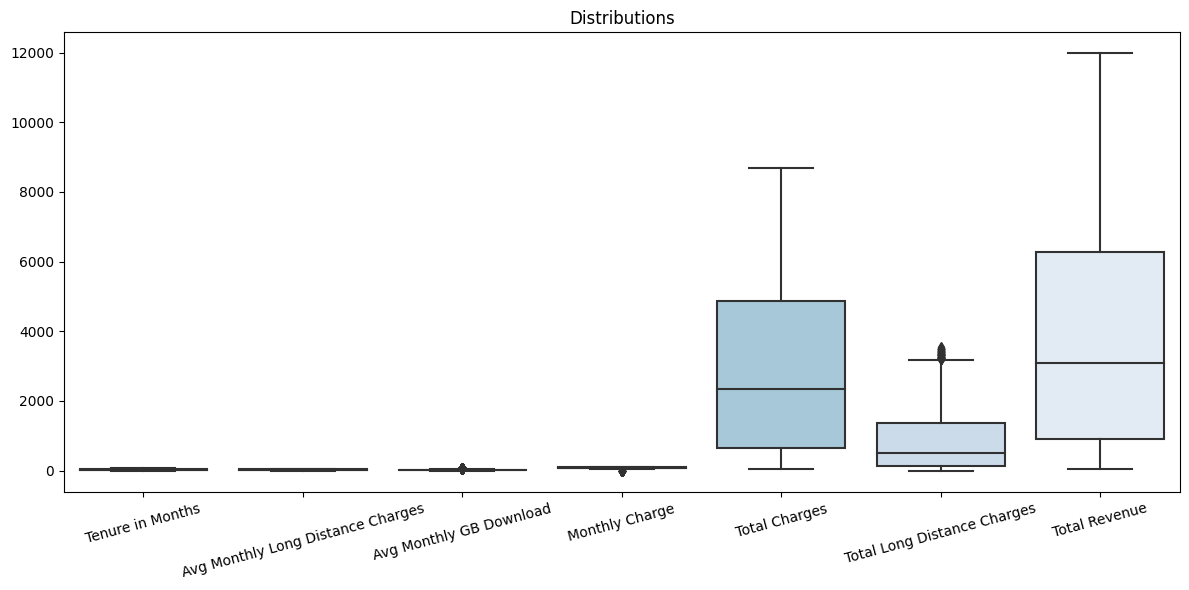

In [19]:
columns_to_check = ['Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 
                    'Total Long Distance Charges', 'Total Revenue']

num_plots = len(columns_to_check)
num_cols = 1
num_rows = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

sns.boxplot(data=df[columns_to_check], palette='Blues_r', orient='v', ax=axes)
axes.set_xlabel('')
axes.set_title('Distributions', fontsize=12)
axes.set_xticklabels(axes.get_xticklabels(), rotation=15, ha='center')

plt.tight_layout()
plt.show()

In [20]:
df['Customer Status'].replace({'Stayed': 'Not Churned',
                               'Joined': 'Not Churned'},
                               inplace=True)

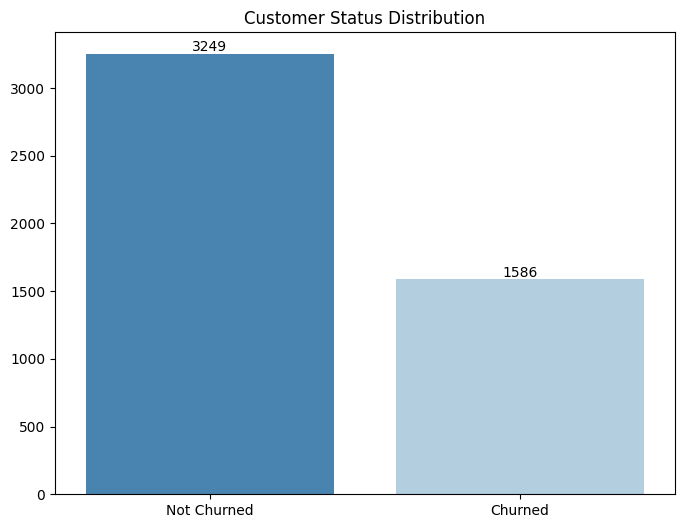

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x=df['Customer Status'], palette='Blues_r')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Customer Status Distribution', loc='center', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

## MULTIVARIATE ANALYSIS

### CORRELATION BETWEEN CATEGORICAL AND TARGET FEATURES

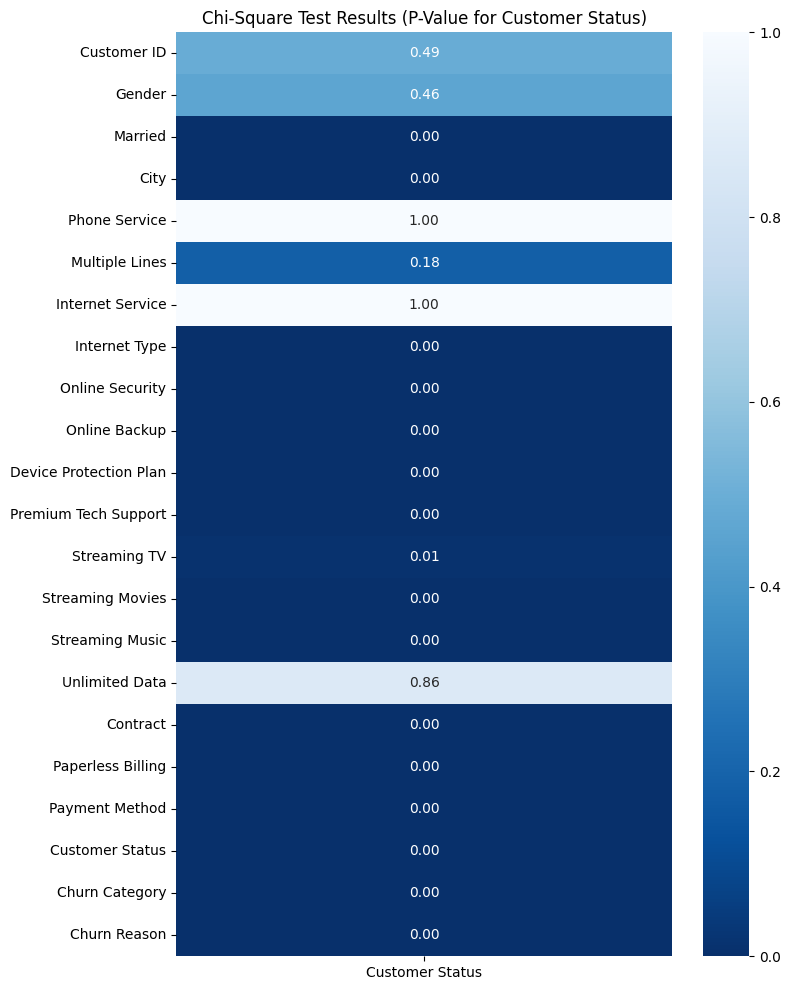

In [22]:
categorical_features = df.select_dtypes(include=['object']).columns
result = pd.DataFrame(index=categorical_features, columns=['Customer Status', 'Chi2 Value'])
result = result.astype(float)

for i in categorical_features:
    contingency_table = pd.crosstab(df[i], df['Customer Status'])
    chi2_val, p_val, _, _ = chi2_contingency(contingency_table)
    result.loc[i, 'Chi2 Value'] = chi2_val
    result.loc[i, 'Customer Status'] = round(p_val, 2)

fig, ax = plt.subplots(figsize=(8, 12))
sns.heatmap(result[['Customer Status']], annot=True, cmap='Blues_r', fmt='.2f', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),  ha='center')
plt.title('Chi-Square Test Results (P-Value for Customer Status)')
plt.show()

In [23]:
df.drop(columns=['Gender', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Unlimited Data'], inplace=True)

### CORRELATION BETWEEN NUMERICAL AND TARGET FEATURES

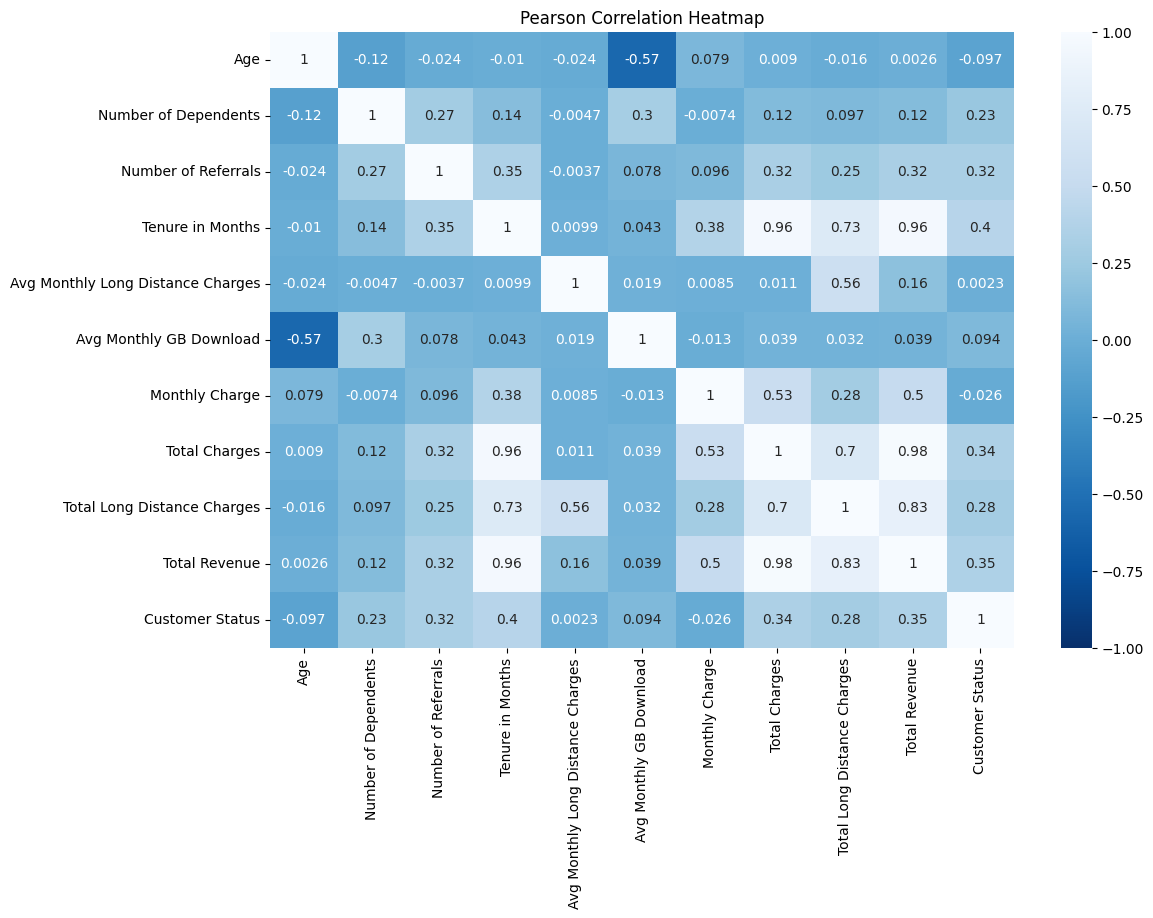

In [24]:
df['Customer Status'] = df['Customer Status'].replace({'Not Churned': 1, 'Churned': 0})
numerical_features = df.select_dtypes(include=['int', 'float']).columns
corr = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='Blues_r', annot_kws={'size': 10})
plt.title('Pearson Correlation Heatmap')
plt.show()

### CHECK VIF SCORE IN NUMERICAL FEATURES

In [25]:
numerical_features = df.select_dtypes(include=['int', 'float']).columns
numeric = df[numerical_features]
numeric = sm.add_constant(numeric)

vif_numeric_pairwise = pd.DataFrame()
vif_numeric_pairwise['Variable'] = numeric.columns[1:]
vif_numeric_pairwise['VIF'] = [variance_inflation_factor(numeric.values, i) for i in range(1, numeric.shape[1])]

vif_threshold = 5

multicollinear_vars = []
for idx, row in vif_numeric_pairwise.iterrows():
    if row['VIF'] > vif_threshold:
        multicollinear_vars.append(row['Variable'])

print('VIF between Numerical Variables (Pairwise):')
print(vif_numeric_pairwise)
print('-'*90)

if multicollinear_vars:
    print('Multicollinearity symptoms were detected in the following variables:')
    for var in multicollinear_vars:
        print(var)
else:
    print('No multicollinearity symptoms were detected')

VIF between Numerical Variables (Pairwise):
                             Variable       VIF
0                                 Age     1.499
1                Number of Dependents     1.209
2                 Number of Referrals     1.253
3                    Tenure in Months    21.109
4   Avg Monthly Long Distance Charges     2.865
5             Avg Monthly GB Download     1.605
6                      Monthly Charge     2.022
7                       Total Charges  6984.353
8         Total Long Distance Charges   902.097
9                       Total Revenue 11398.695
10                    Customer Status     1.337
------------------------------------------------------------------------------------------
Multicollinearity symptoms were detected in the following variables:
Tenure in Months
Total Charges
Total Long Distance Charges
Total Revenue


### DROP COLUMNS HAVE HIGH VIF SCORE

In [24]:
df.drop(columns=['Total Charges', 'Total Long Distance Charges', 'Total Revenue'], inplace=True)

In [27]:
numerical_features = df.select_dtypes(include=['int', 'float']).columns
numeric = df[numerical_features]
numeric = sm.add_constant(numeric)

vif_numeric_pairwise = pd.DataFrame()
vif_numeric_pairwise['Variable'] = numeric.columns[1:]
vif_numeric_pairwise['VIF'] = [variance_inflation_factor(numeric.values, i) for i in range(1, numeric.shape[1])]

vif_threshold = 5

multicollinear_vars = []
for idx, row in vif_numeric_pairwise.iterrows():
    if row['VIF'] > vif_threshold:
        multicollinear_vars.append(row['Variable'])

print('VIF between Numerical Variables (Pairwise):')
print(vif_numeric_pairwise)
print('-'*90)

if multicollinear_vars:
    print('Multicollinearity symptoms were detected in the following variables:')
    for var in multicollinear_vars:
        print(var)
else:
    print('No multicollinearity symptoms were detected')

VIF between Numerical Variables (Pairwise):
                            Variable   VIF
0                                Age 1.498
1               Number of Dependents 1.209
2                Number of Referrals 1.251
3                   Tenure in Months 1.540
4  Avg Monthly Long Distance Charges 1.001
5            Avg Monthly GB Download 1.603
6                     Monthly Charge 1.233
7                    Customer Status 1.335
------------------------------------------------------------------------------------------
No multicollinearity symptoms were detected


## DATA PRE-PROCESSING 3

### FEATURE ENCODING

In [28]:
label_encoder = LabelEncoder()
features_to_label_encode = ['Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music',
                            'Paperless Billing']

for feature in features_to_label_encode:
    df[feature] = label_encoder.fit_transform(df[feature])

df = pd.get_dummies(df, columns=['Married', 'Internet Type', 'Contract', 'Payment Method'])

### TRAIN TEST SPLIT

In [29]:
X = df.drop(['Customer Status'], axis=1)
y = df['Customer Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### FEATURE IMBALANCED

In [30]:
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

X_train_strat, X_val_strat, y_train_strat, y_val_strat = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, stratify=y_train_resampled, random_state=42)

## MODEL TRAINING

In [31]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

results = []

for model_name, model in classifiers.items():

    model.fit(X_train_strat, y_train_strat)

    y_pred_train = model.predict(X_train_strat)
    y_pred_probabilities_train = model.predict_proba(X_train_strat)

    y_pred_val = model.predict(X_val_strat)
    y_pred_probabilities_val = model.predict_proba(X_val_strat)

    accuracy_train = accuracy_score(y_train_strat, y_pred_train)
    accuracy_val = accuracy_score(y_val_strat, y_pred_val)

    precision_train = precision_score(y_train_strat, y_pred_train)
    precision_val = precision_score(y_val_strat, y_pred_val)

    recall_train = recall_score(y_train_strat, y_pred_train)
    recall_val = recall_score(y_val_strat, y_pred_val)

    f1_train = f1_score(y_train_strat, y_pred_train)
    f1_val = f1_score(y_val_strat, y_pred_val)

    roc_auc_train = roc_auc_score(y_train_strat, y_pred_probabilities_train[:, 1])
    roc_auc_val = roc_auc_score(y_val_strat, y_pred_probabilities_val[:, 1])

    logloss_train = log_loss(y_train_strat, y_pred_probabilities_train)
    logloss_val = log_loss(y_val_strat, y_pred_probabilities_val)

    result = {
        'Model': model_name,

        'Train Accuracy': accuracy_train,
        'Validation Accuracy': accuracy_val,

        'Train Precision': precision_train,
        'Validation Precision': precision_val,

        'Train Recall': recall_train,
        'Validation Recall': recall_val,

        'Train F1 Score': f1_train,
        'Validation F1 Score': f1_val,

        'Train ROC AUC': roc_auc_train,
        'Validation ROC AUC': roc_auc_val,

        'Train Log Loss': logloss_train,
        'Validation Log Loss': logloss_val
    }

    results.append(result)

results_df = pd.DataFrame(results)
print(results_df.to_string())

                 Model  Train Accuracy  Validation Accuracy  Train Precision  Validation Precision  Train Recall  Validation Recall  Train F1 Score  Validation F1 Score  Train ROC AUC  Validation ROC AUC  Train Log Loss  Validation Log Loss
0  Logistic Regression           0.804                0.810            0.832                 0.842         0.761              0.762           0.795                0.800          0.892               0.893           0.415                0.408
1        Decision Tree           1.000                0.716            1.000                 0.709         1.000              0.734           1.000                0.721          1.000               0.716           0.000               10.227
2        Random Forest           1.000                0.804            1.000                 0.823         1.000              0.774           1.000                0.798          1.000               0.876           0.114                0.446
3    Gradient Boosting           0.8

## MODEL EVALUATION

### HYPER-PARAMETER TUNING USING PIPELINE

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 
                                 'Monthly Charge'])
    ],
    remainder='passthrough'
)

pipeline_lr = Pipeline(steps = [['scaler', preprocessor],
                                 ['classifier', LogisticRegression()]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=42)
    
param_dist_lr = {
    'classifier__C': np.arange(0.1, 1.1, 0.1),
    'classifier__fit_intercept': [True, False],
    'classifier__max_iter': np.arange(1, 101, 1)
}

random_search_lr = RandomizedSearchCV(estimator=pipeline_lr,
                                      param_distributions=param_dist_lr,
                                      n_iter=1000,
                                      scoring=None,
                                      cv=stratified_kfold,
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1,
                                      error_score='raise')

random_search_lr.fit(X_train_strat, y_train_strat)
best_logistic_reg_model = random_search_lr.best_estimator_

y_pred__test_lr = best_logistic_reg_model.predict(X_test)
y_pred_probabilities_lr = best_logistic_reg_model.predict_proba(X_test)

accuracy_lr = accuracy_score(y_test, y_pred__test_lr)
precision_lr = precision_score(y_test, y_pred__test_lr)
recall_lr = recall_score(y_test, y_pred__test_lr)
f1_lr = f1_score(y_test, y_pred__test_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_probabilities_lr[:, 1])
logloss_lr = log_loss(y_test, y_pred_probabilities_lr)

print('Best Parameters for Logistic Regression:', random_search_lr.best_params_)
print('-'*90)
print('Accuracy Score for Logistic Regression:', accuracy_lr)
print('Precision Score for Logistic Regression:', precision_lr)
print('Recall Score for Logistic Regression:', recall_lr)
print('F1 Score Score for Logistic Regression:', f1_lr)
print('ROC AUC Score for Logistic Regression:', roc_auc_lr)
print('Log Loss Score for Logistic Regression:', logloss_lr)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Parameters for Logistic Regression: {'classifier__max_iter': 19, 'classifier__fit_intercept': False, 'classifier__C': 0.8}
------------------------------------------------------------------------------------------
Accuracy Score for Logistic Regression: 0.7642192347466391
Precision Score for Logistic Regression: 0.9021526418786693
Recall Score for Logistic Regression: 0.7214397496087637
F1 Score Score for Logistic Regression: 0.8017391304347825
ROC AUC Score for Logistic Regression: 0.8756965914729571
Log Loss Score for Logistic Regression: 0.45037251685888263


In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['Age', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 
                                 'Monthly Charge'])
    ],
    remainder='passthrough'
)

pipeline_gb = Pipeline(steps = [['scaler', preprocessor],
                                 ['classifier', GradientBoostingClassifier()]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=42)
    
param_dist_gb = {
    'classifier__loss': ['log_loss', 'exponential'],
    'classifier__learning_rate': np.arange(0.01, 1.1, 0.1),
    'classifier__n_estimators': np.arange(10, 110, 10),
    'classifier__subsample': np.arange(0.7, 1.01, 0.1),
    'classifier__criterion': ['friedman_mse', 'squared_error'],
    'classifier__min_samples_split': np.arange(2, 31, 1),
    'classifier__min_samples_leaf': np.arange(1, 31, 1),
    'classifier__max_depth': np.arange(3, 51, 1),
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_leaf_nodes': np.arange(10, 110, 10)
}

random_search_gb = RandomizedSearchCV(estimator=pipeline_gb,
                                      param_distributions=param_dist_gb,
                                      n_iter=1000,
                                      scoring=None,
                                      cv=stratified_kfold,
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1,
                                      error_score='raise')

random_search_gb.fit(X_train_strat, y_train_strat)
best_gradient_boost_model = random_search_gb.best_estimator_

y_pred__test_gb = best_gradient_boost_model.predict(X_test)
y_pred_probabilities_gb = best_gradient_boost_model.predict_proba(X_test)

accuracy_gb = accuracy_score(y_test, y_pred__test_gb)
precision_gb = precision_score(y_test, y_pred__test_gb)
recall_gb = recall_score(y_test, y_pred__test_gb)
f1_gb = f1_score(y_test, y_pred__test_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_probabilities_gb[:, 1])
logloss_gb = log_loss(y_test, y_pred_probabilities_gb)

print('Best Parameters for Gradient Boosting:', random_search_gb.best_params_)
print('-'*90)
print('Accuracy Score for Gradient Boosting:', accuracy_gb)
print('Precision Score for Gradient Boosting:', precision_gb)
print('Recall Score for Gradient Boosting:', recall_gb)
print('F1 Score Score for Gradient Boosting:', f1_gb)
print('ROC AUC Score for Gradient Boosting:', roc_auc_gb)
print('Log Loss Score for Gradient Boosting:', logloss_gb)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Parameters for Gradient Boosting: {'classifier__subsample': 0.9999999999999999, 'classifier__n_estimators': 30, 'classifier__min_samples_split': 14, 'classifier__min_samples_leaf': 25, 'classifier__max_leaf_nodes': 30, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 43, 'classifier__loss': 'exponential', 'classifier__learning_rate': 0.11, 'classifier__criterion': 'friedman_mse'}
------------------------------------------------------------------------------------------
Accuracy Score for Gradient Boosting: 0.7859358841778697
Precision Score for Gradient Boosting: 0.8941605839416058
Recall Score for Gradient Boosting: 0.7668231611893583
F1 Score Score for Gradient Boosting: 0.8256107834877844
ROC AUC Score for Gradient Boosting: 0.8877247223176457
Log Loss Score for Gradient Boosting: 0.42703397790278724


### CLASSIFICATION REPORT

In [34]:
from sklearn.metrics import classification_report

report_lr = classification_report(y_test, y_pred__test_lr)
print('Classification Report for Logistic Regression:')
print(report_lr)
print()

report_gb = classification_report(y_test, y_pred__test_gb)
print('Classification Report for Gradient Boosting:')
print(report_gb)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.61      0.85      0.71       328
           1       0.90      0.72      0.80       639

    accuracy                           0.76       967
   macro avg       0.76      0.78      0.76       967
weighted avg       0.80      0.76      0.77       967


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       328
           1       0.89      0.77      0.83       639

    accuracy                           0.79       967
   macro avg       0.77      0.79      0.77       967
weighted avg       0.81      0.79      0.79       967



### CONFUSION MATRIX

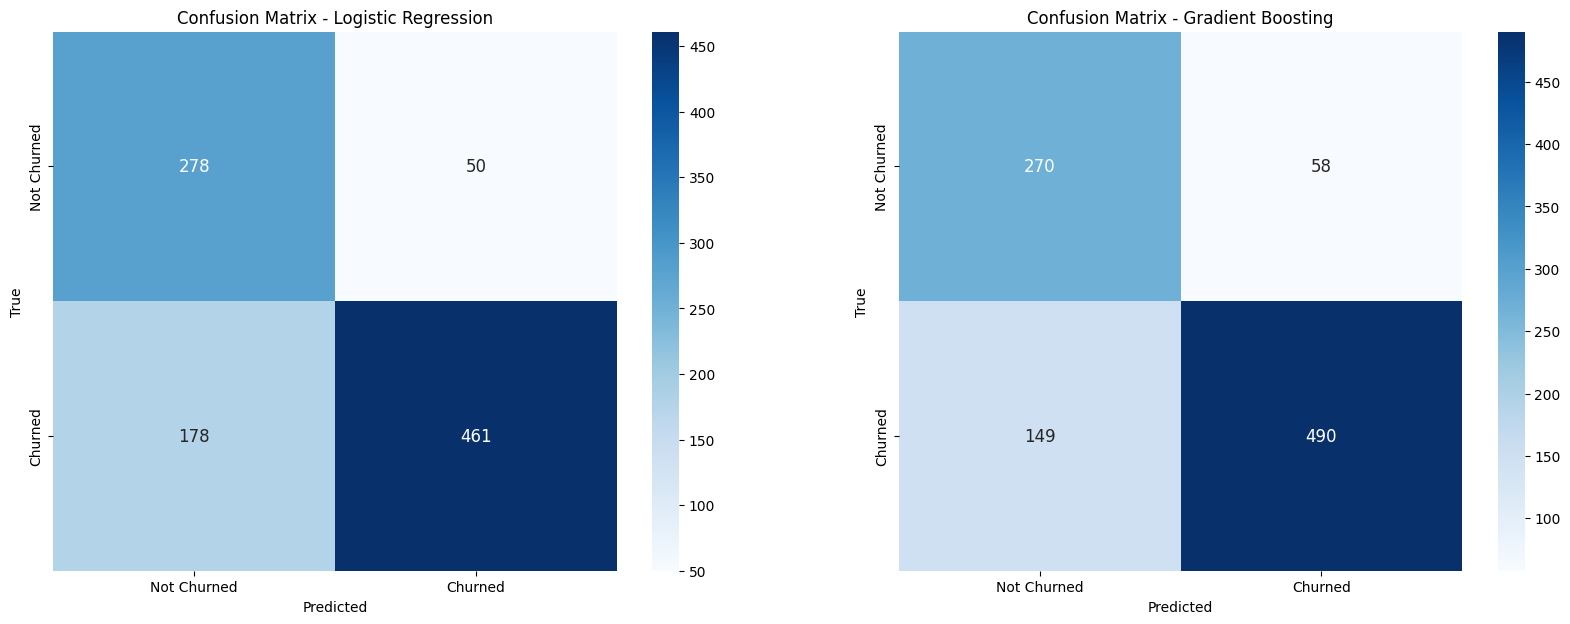

In [37]:
class_labels = ['Not Churned', 'Churned']

conf_matrix_lr = confusion_matrix(y_test, y_pred__test_lr)
conf_matrix_gb = confusion_matrix(y_test, y_pred__test_gb)

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12},
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 12},
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title('Confusion Matrix - Gradient Boosting')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()